# Encoder Tracking #
Steve Jones 7/22/22


## Establish Ethernet Link ##

In [35]:
import os
import pathlib as pl
import sys
import time
import pandas as pd
import matplotlib.pyplot as plt

repo_dir = pl.Path(os.path.dirname(os.getcwd()))
sys.path.append(str(repo_dir / 'AMDC-Firmware' / 'scripts'))

from AMDC import AMDC
from AMDC_Logger import AMDC_Logger, find_mapfile
from AMDC_LivePlot import AMDC_LivePlot

amdc = AMDC()

# After creating the amdc object...

# Set comm defaults for Ethernet
amdc.setup_comm_defaults('eth')

# Init ethernet 
amdc.eth_init()

# Set up the default ASCII command socket
s0, s0_id = amdc.eth_new_socket('ascii_cmd')
amdc.eth_set_default_ascii_cmd_socket(s0)

# Cretae AMDC Logger Object
mapfile_path = find_mapfile(repo_dir)
logger = AMDC_Logger(AMDC = amdc, mapfile = mapfile_path)

## Init Hardware ##

In [36]:
amdc.cmd('hw enc init')

	> hw enc init
['hw enc init', 'SUCCESS']


['hw enc init', 'SUCCESS']

## Get Current Z Postion ##

In [37]:
amdc.cmd('hw enc pos')

	> hw enc pos
['hw enc pos', 'pos: 2134', 'SUCCESS']


['hw enc pos', 'pos: 2134', 'SUCCESS']

## CVCR Log Encoder Position - Timed ##

	> log info
	> log reg 0 LOG_encPos 537543408 100 double
['log reg 0 LOG_encPos 537543408 100 double', 'SUCCESS']
	> log empty_all
['log empty_all', 'SUCCESS']
	> cvcr init
['cvcr init', 'FAILURE']
	> cvcr enc
['cvcr enc', 'SUCCESS']
	> log start
['log start', 'SUCCESS']
	> log stop
['log stop', 'SUCCESS']
	> log dump eth bin 0
Dumping: LOG_encPos
Dump took: 0.066  sec
Dump rate: 15192.249  sps
Num samples: 1002 

	> log unreg 0
['log unreg 0', 'SUCCESS']


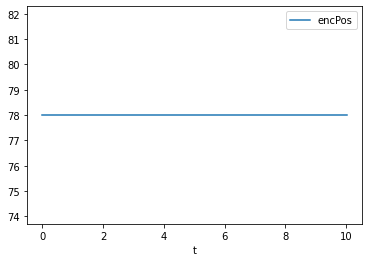

In [39]:
# Setup Logger
logger.sync()

# Register Vars
logger.register('encPos', samples_per_sec = 100, var_type = 'double')

# Clear log
logger.empty_all()

# Start system
amdc.cmd('cvcr init')
amdc.cmd('cvcr enc')

# Record data 
logger.log(duration = 10)

# Stop system
amdc.cmd('cvcr deinit')

# Retrieve Data - return as Panda DataFrame obj
data = logger.dump(log_vars = 'encPos')

# Plot data
data.plot()

# Unregister Vars
logger.unregister_all()

## CVCR Log Encoder Position - Streaming ##

	> log info
	> log reg 0 LOG_encPos 537546520 100 double
['log reg 0 LOG_encPos 537546520 100 double', 'SUCCESS']
	> log empty_all
['log empty_all', 'SUCCESS']
	> cvcr init
['cvcr init', 'SUCCESS']
	> cvcr enc
['cvcr enc', 'SUCCESS']


<IPython.core.display.Javascript object>


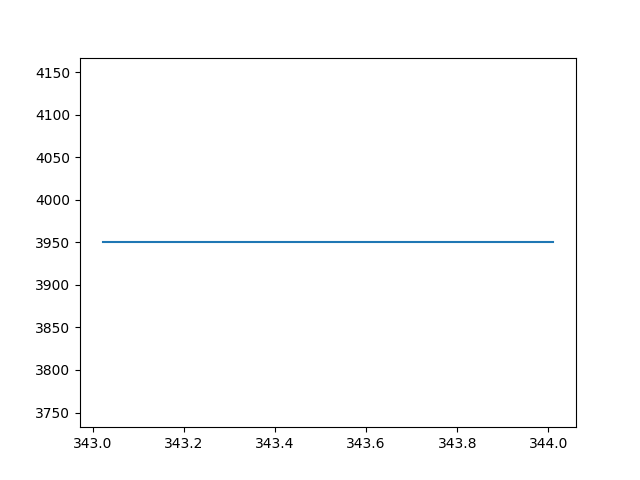

	> log stream start 0 1
['log stream start 0 1', 'SUCCESS']


In [21]:
# Setup Logger
logger.sync()

# Register Vars
logger.register('encPos', samples_per_sec = 100, var_type = 'double')

# Clear log
logger.empty_all()

# Start the log
amdc.cmd('cvcr enc')

# Streaming Log 

# Jupyter notebook command for live plot
%matplotlib notebook

# plot w/ 1,000ms frame update w/ a 0.1s window length
# plot = AMDC_LivePlot(logger, 'Va', window_sec = 1000, 0.1)
p1 = AMDC_LivePlot(logger, 'encPos', window_sec = 1)
p1.start_stream()
p1.show()

## Terminate the Streaming Log ##

In [22]:
# Stop the logger
amdc.cmd('cvcr deinit')

##### CELL START #####
p1.stop_stream()

# Return to static inline plots
%matplotlib inline

# Unregister Vars
logger.unregister_all()

	> cvcr deinit
['cvcr deinit', 'SUCCESS']
	> log stream stop 0 1
['log stream stop 0 1', 'SUCCESS']
	> log unreg 0
['log unreg 0', 'SUCCESS']
